In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [42]:
# tendencia - direçao
# sazonalidade - recorrência das oscilações
# resíduo - o que sobra do sinal

In [43]:
df_path = 'https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv'

In [44]:
df = pd.read_csv(df_path, parse_dates=[0], index_col=['DATE'])

In [45]:
df.head(3)

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


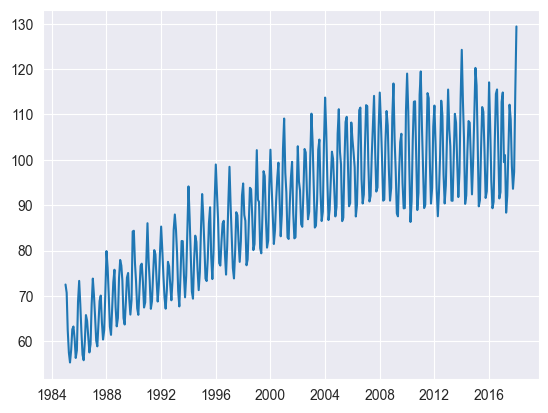

In [47]:
plt.plot(df.index, df['Value'])

In [48]:
resultados = seasonal_decompose(df)

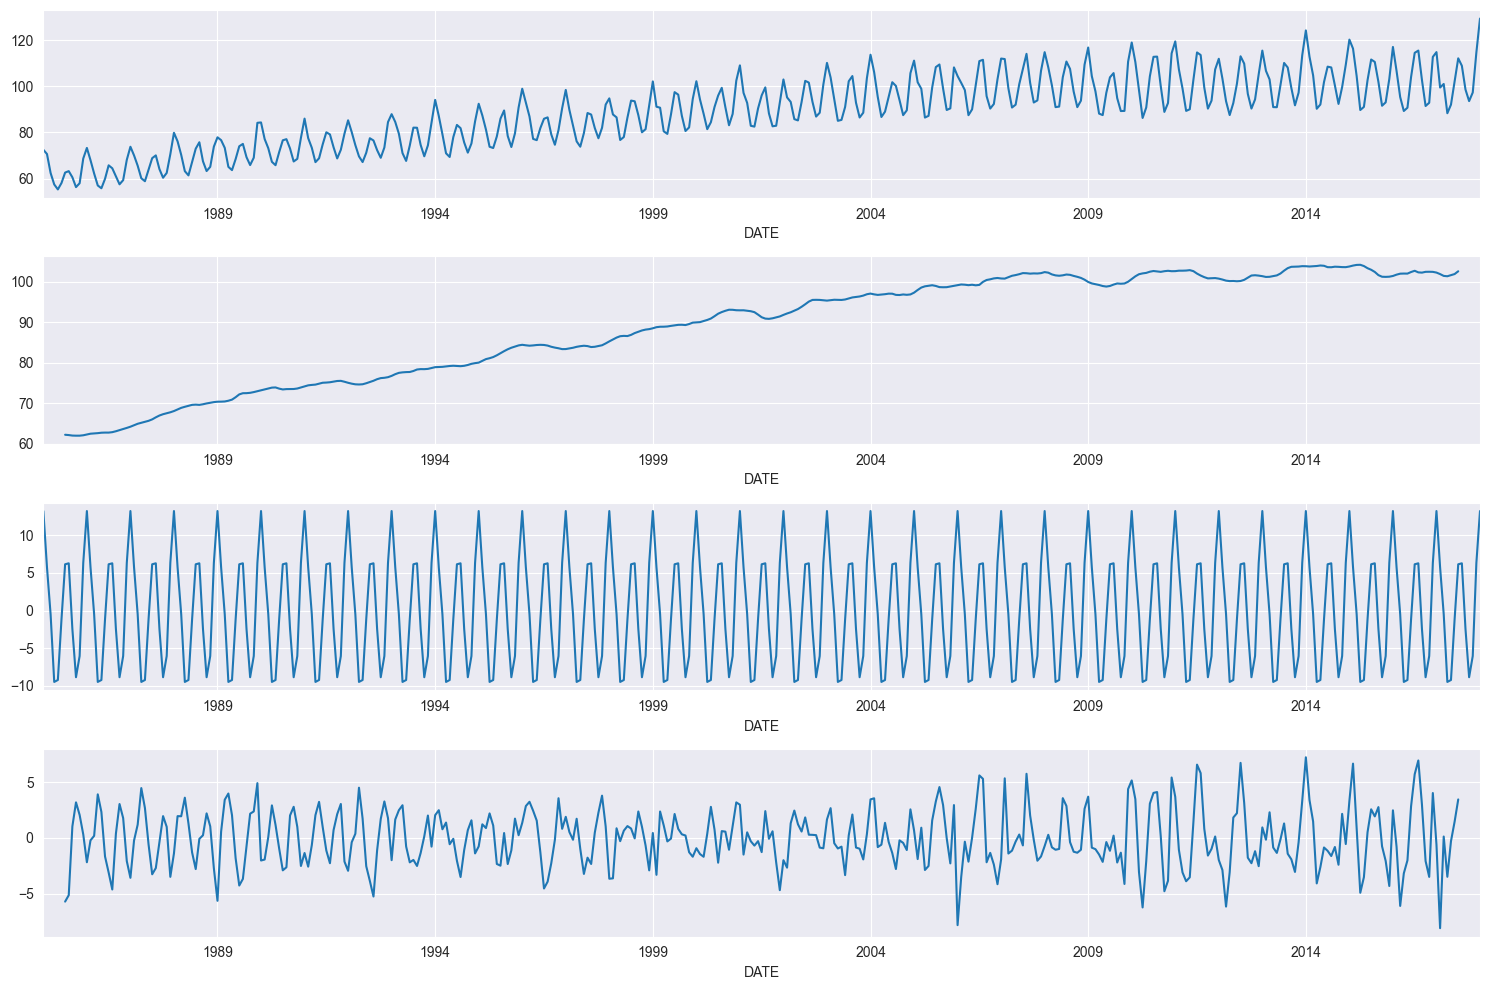

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [50]:
# Estacionaria ou nao estacionaria

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipotese Alternatica (rejeição da hipótese nula)

# p - value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [51]:
sns.set_style('darkgrid')

In [52]:
x = df['Value'].values

In [53]:
result = adfuller(x)

print('Teste ADF')
print(f'Teste Estatistico: {result[0]}')
print(f'P-value: {result[1]}')
print(f'Valores críticos: ')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -2.25699035004725
P-value: 0.18621469116586592
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


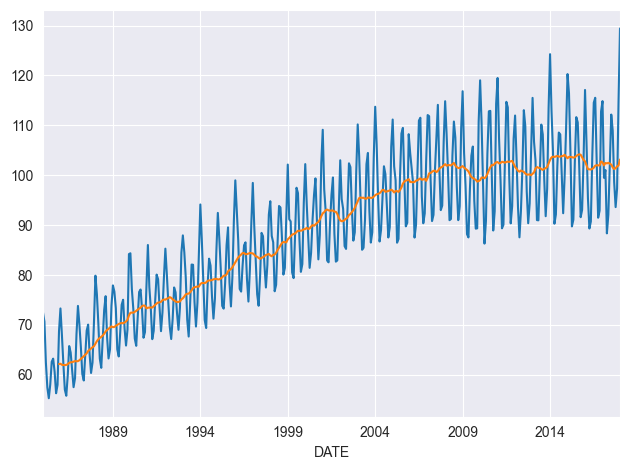

In [54]:
ma = df.rolling(12).mean()

figure, ax = plt.subplots()

df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False)

plt.tight_layout()

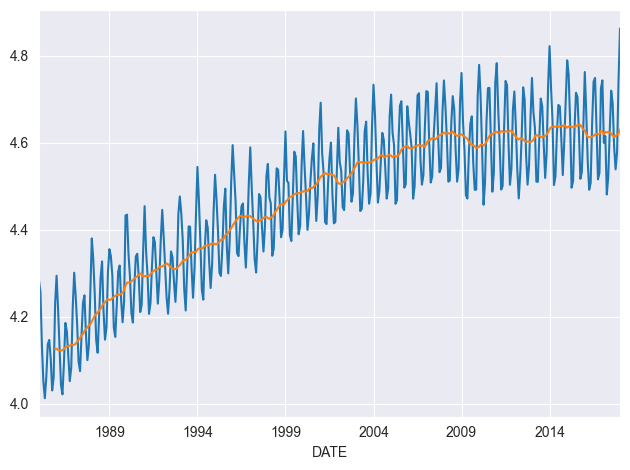

In [55]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

figure, ax = plt.subplots()

df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False)

plt.tight_layout()

In [56]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

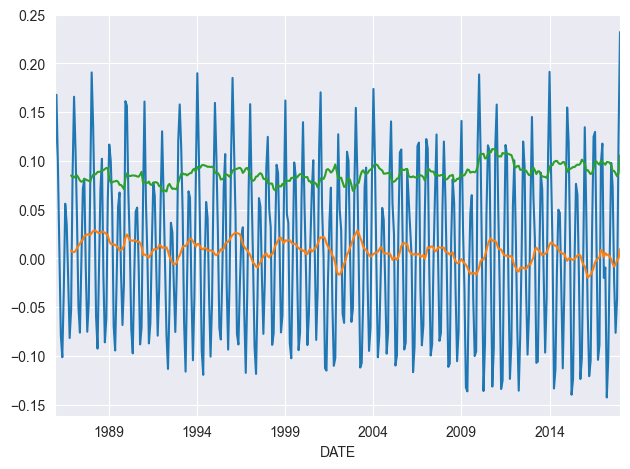

In [57]:
figure, ax = plt.subplots()

df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False)
std.plot(ax=ax, legend=False)

plt.tight_layout()

In [58]:
x_s = df_s['Value'].values
result_s = adfuller(x_s)

print('Teste ADF')
print(f'Teste Estatistico: {result_s[0]}')
print(f'P-value: {result_s[1]}')
print(f'Valores críticos: ')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -5.211586185365426
P-value: 8.325639759946677e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


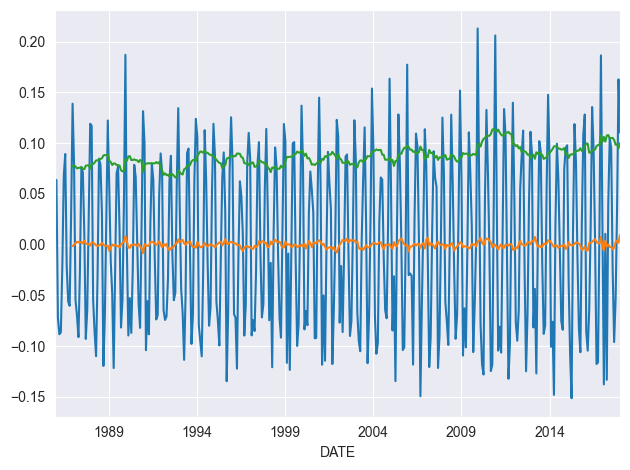

In [59]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

figure, ax = plt.subplots()

df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False)
std_diff.plot(ax=ax, legend=False)

plt.tight_layout()

In [60]:
x_diff = df_diff['Value'].dropna().values
result_diff = adfuller(x_diff)

print('Teste ADF')
print(f'Teste Estatistico: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Valores críticos: ')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -7.651129568145156
P-value: 1.788126735435908e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


In [ ]:
# ARIMA  - (AR): Autoregressivo, I: Integrado, MA: Moving Average

# A(x, y, z) - ACF, PACF

In [61]:
lag_acf = acf(df_diff.dropna(), nlags=25)

lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [62]:
# 5% ACF

# 1.96/sqrt(N-d) -> N - numero de pontos do df, D - numero de vezes que nos diferenciamos o df

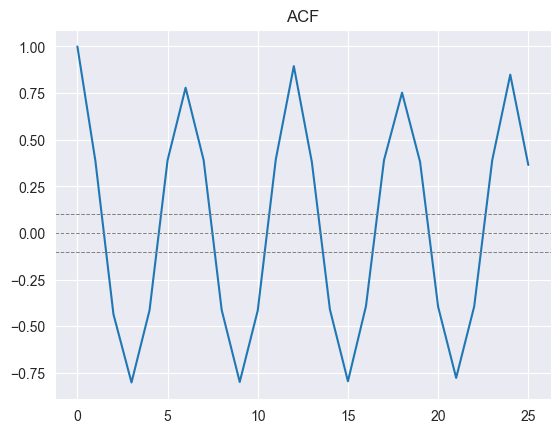

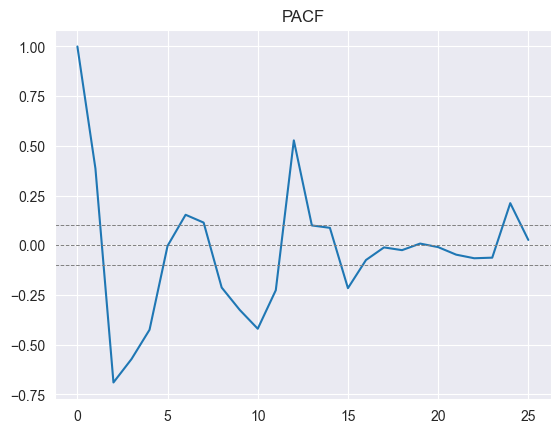

In [70]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('ACF')

plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('PACF')

plt.show()


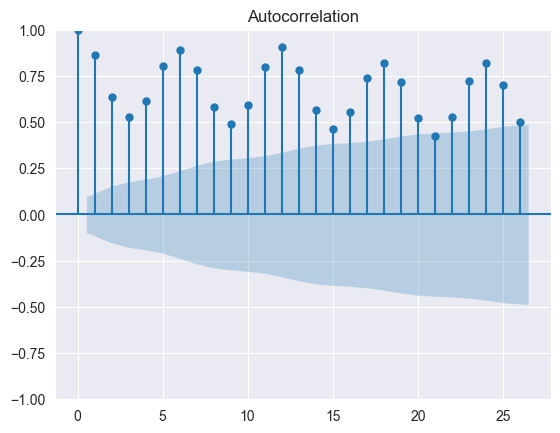

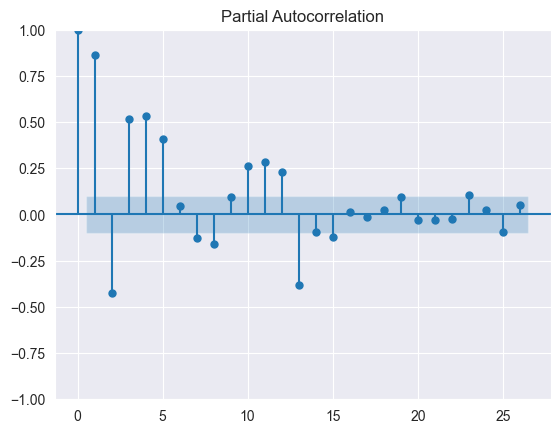

In [74]:
plot_acf(df['Value'])
plot_pacf(df['Value'])
plt.show()